In [1]:
import sys
sys.path.insert(0, "../../..")
from paths import FIG_DIR, DATA_DIR

import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv
import cellrank as cr

import matplotlib.pyplot as plt
%matplotlib inline

# set verbosity levels
sc.settings.verbosity = 2
cr.settings.verbosity = 2

/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is dep

In [2]:
cr.settings.figdir = str(FIG_DIR)
scv.settings.figdir = str(FIG_DIR)

In [3]:
scv.settings.set_figure_params('scvelo', dpi_save=300, dpi=80, transparent=True, fontsize=20, color_map='viridis')
scv.settings.plot_prefix = ""

In [4]:
adata = sc.read(DATA_DIR / 'scv_velocyto_perturb.h5ad')
adata.uns['leiden_cluster_id_colors'] = \
{'N': '#a9bb4c',
 'A': '#d70000',
 'B': '#bcb7ff',
 'R': '#e7d77c',
 'F': '#a00073',
 'J': '#00ec02',
 'K': '#396e64',
 'E': '#fe03cb',
 'T': '#2f3ea8',
 'D': '#db6d01',
 'S': '#f3ddff',
 'O': '#c97add',
 'L': '#a5c5a9',
 'H': '#5145a2',
 'G': '#ffa079',
 'C': '#ec0077',
 'Q': '#886fb2',
 'P': '#840076',
 'I': '#cd2947',
 'M': '#8000ff'}

saving figure to file /Users/yuhaochen/Documents/GitHub/graphvelo_reproducibility/figures/figures_sars_cov_2/umap_M_org.pdf


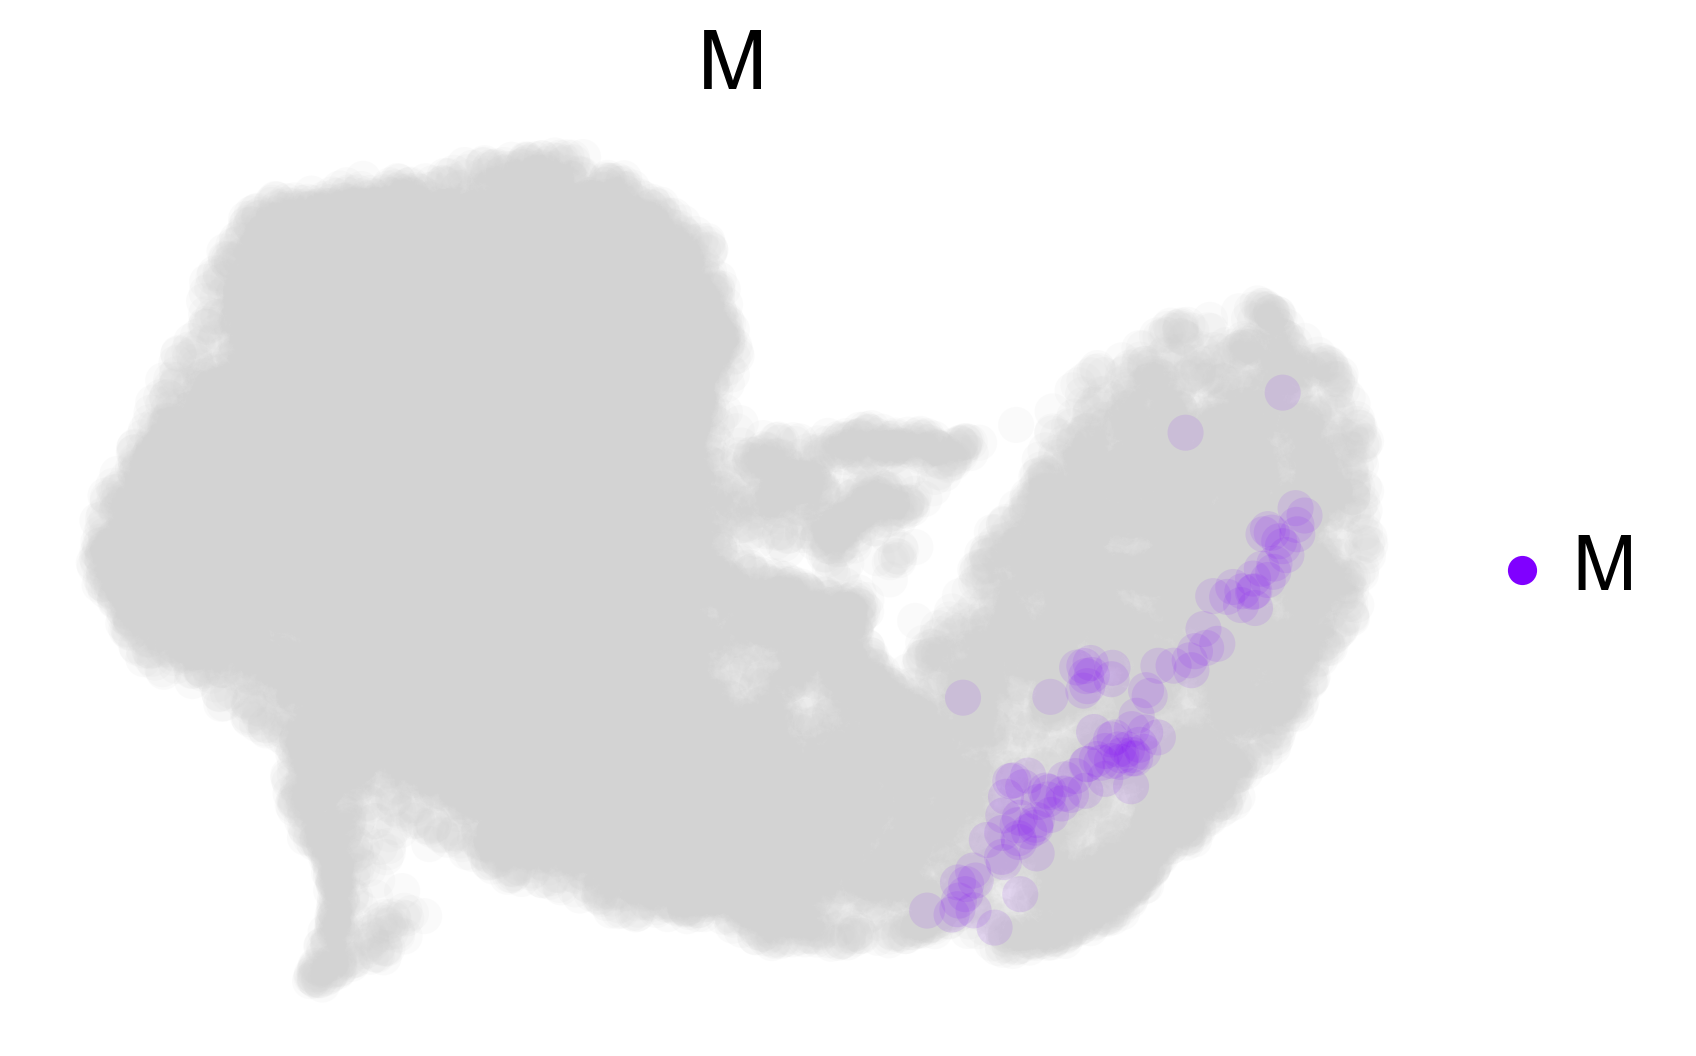

In [29]:
fig_kwargs = {'color': 'leiden_cluster_id', 'legend_loc': 'right', 'groups': 'M', 'size': 300, 'alpha': 0.1, 'dpi': 150, }
fig_kwargs['save'] = scv.settings.figdir+'figures_sars_cov_2/umap_M_org.pdf'
scv.pl.scatter(adata, **fig_kwargs)

In [4]:
bdata = sc.read('scv_gv.h5ad')
bdata.uns['leiden_cluster_id_colors'] = ['#8000ff', '#ff7f0e', '#814f96', '#80ffb4', '#8c564b', '#dc73a7', '#2ca02c']
bdata

AnnData object with n_obs × n_vars = 5001 × 1000
    obs: 'guide_identity', 'number_of_guides', 'guide_read_count', 'guide_UMI_count', 'guide_coverage', 'gem_group', 'CRISPRi_library_element', 'viral_load', 'log_viral_load', 'infection_status', 'cell_cycle_phase', 'leiden_cluster_id', 'umap_coord1', 'umap_coord2', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'initial_spliced_cell_size', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'Size_Factor', 'spliced_Size_Factor', 'ntr'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'nCells', 'nCounts', 'pass_basic_filter', 'log_cv', 'log_m', 'score', 'frac', 'use_for_pca', 'ntr', 'use_for_dynamics', 'use_for_transition'
    uns: 'PCs', 'cell_phase_genes', 'cell_phase_order', 'dynamics', 'explained_variance_ratio_', 'feature_selection', 'grid_velocity_umap', 'gv_params', 'neighbors', 'pca_fit', 'pca_mean', 'pp', 'umap_fit', 'vel_params_names', 'velocyto_SVR', 'leiden_cluster_id_colors'
    obsm: 

saving figure to file /Users/yuhaochen/Documents/GitHub/graphvelo_reproducibility/figures/figures_sars_cov_2/umap_M_infected.pdf


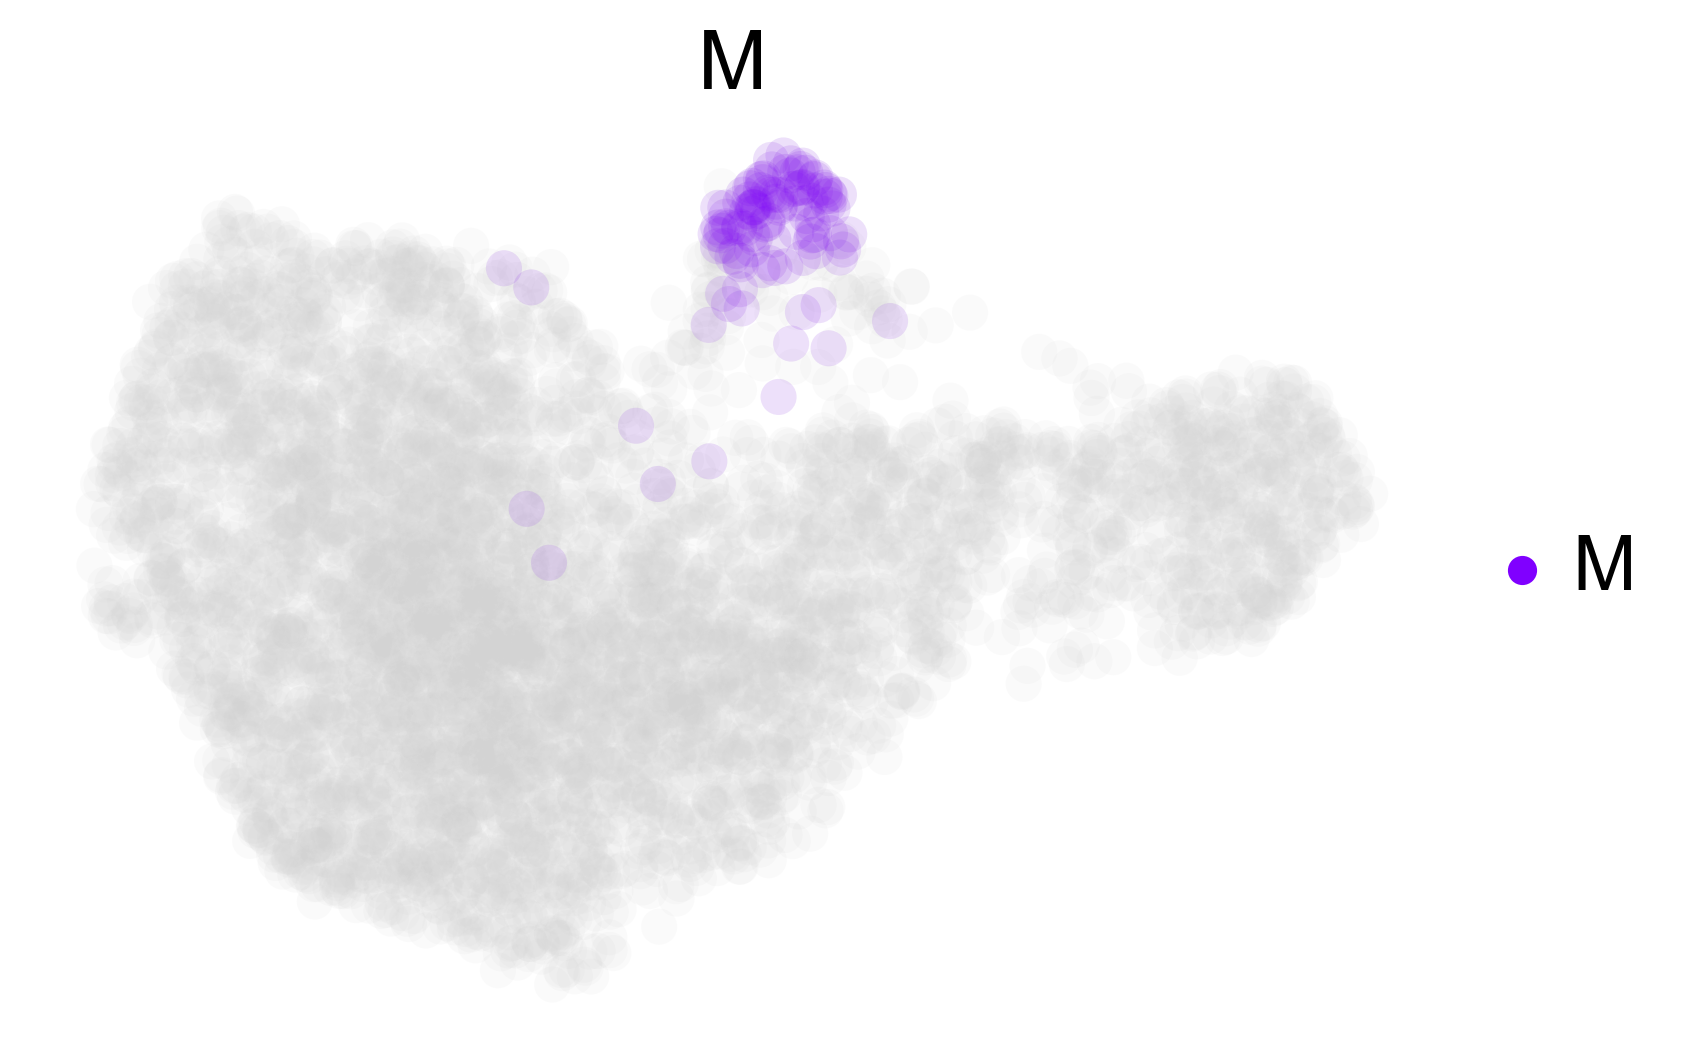

In [28]:
fig_kwargs = {'color': 'leiden_cluster_id', 'legend_loc': 'right', 'groups': 'M', 'size': 300, 'alpha': 0.1, 'dpi': 150, }
fig_kwargs['save'] = scv.settings.figdir+'figures_sars_cov_2/umap_M_infected.pdf'
scv.pl.scatter(bdata, **fig_kwargs)

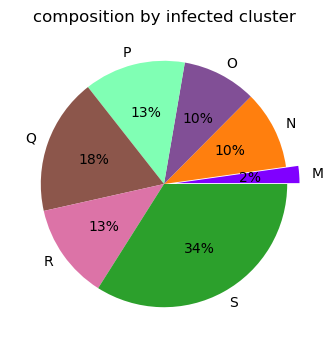

There are 112 abortively infected cells in the data


In [4]:
clusters = bdata.obs['leiden_cluster_id'].cat.categories
explode = np.zeros(len(clusters))
mask = (clusters == 'M')
explode[mask] = 0.1

fig_kwargs = {'autopct': '%1.0f%%', 'explode': explode}
colors = bdata.uns.get('leiden_cluster_id_colors')
x = bdata.obs['leiden_cluster_id'].value_counts(sort=False)

fig, ax = plt.subplots(1,1, dpi=100, figsize=(4,4))
ax.pie(
    x=x,
    labels=x.index,
    colors=colors,
    textprops={"fontsize": None},
    **fig_kwargs,
)
ax.set_title(f"composition by infected cluster")
plt.savefig(FIG_DIR / 'figures_sars_cov_2' / 'infected_composition.pdf', dpi=300, transparent=True)
plt.show()

# print absolute number of Delta cells
print(f"There are {np.sum(bdata.obs['leiden_cluster_id'] == 'M')} abortively infected cells in the data")

In [5]:
sc.tl.pca(bdata)
sc.pp.neighbors(bdata, random_state=0)

computing PCA
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:02)


In [6]:
vk = cr.kernels.VelocityKernel(bdata, xkey='M_s', vkey='velocity_gv')
vk.compute_transition_matrix()
ck = cr.kernels.ConnectivityKernel(bdata)
ck.compute_transition_matrix()
kernel = 0.8 * vk + 0.2 * ck

Computing transition matrix using `'deterministic'` model


  0%|          | 0/5001 [00:00<?, ?cell/s]

Using `softmax_scale=1.0524`


  0%|          | 0/5001 [00:00<?, ?cell/s]

    Finish (0:00:04)
Computing transition matrix based on `adata.obsp['connectivities']`
    Finish (0:00:00)


In [7]:
from cellrank.estimators import GPCCA
g_fwd = GPCCA(kernel)
g_fwd

GPCCA[kernel=(0.8 * VelocityKernel[n=5001] + 0.2 * ConnectivityKernel[n=5001]), initial_states=None, terminal_states=None]

Computing Schur decomposition
When computing macrostates, choose a number of states NOT in `[6, 11, 14, 17, 19]`
Adding `adata.uns['eigendecomposition_fwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)


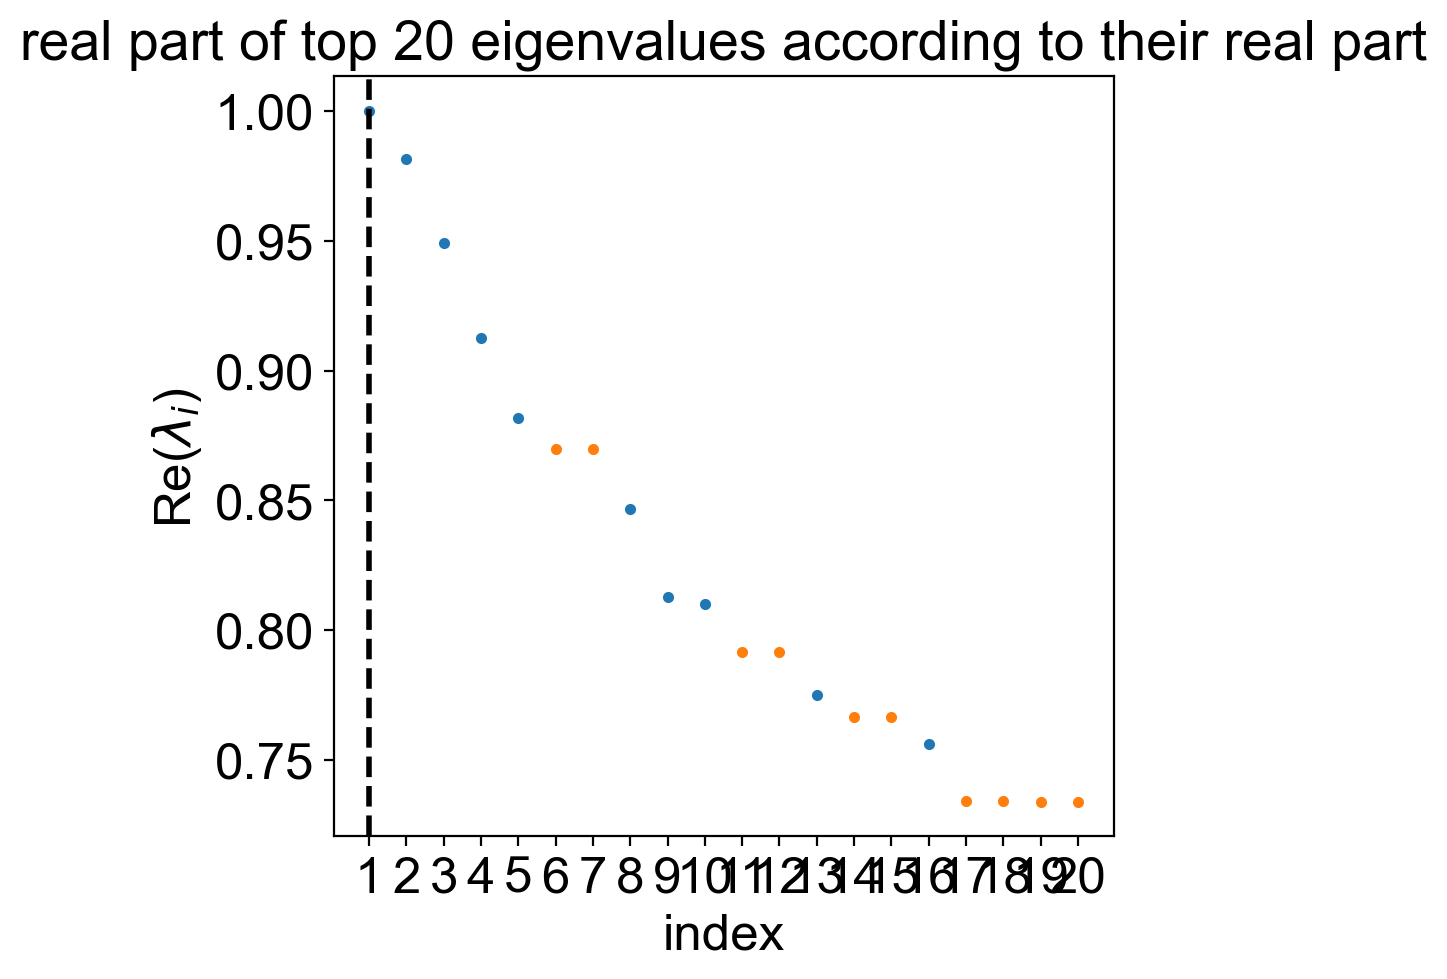

In [8]:
g_fwd.compute_schur()
g_fwd.plot_spectrum(real_only=True)

Computing Schur decomposition
When computing macrostates, choose a number of states NOT in `[6]`
Adding `adata.uns['eigendecomposition_fwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Calculating minChi criterion in interval `[5, 7]`
Computing `5` macrostates
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)


/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/scatter.py:694: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/utils.py:1396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=bg_size, marker=".", c=bg_color, zorder=zord - 2, **kwargs)
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/utils.py:1397: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=gp_size, marker=".", c=gp_color, zorder=zord - 1, **kwargs)


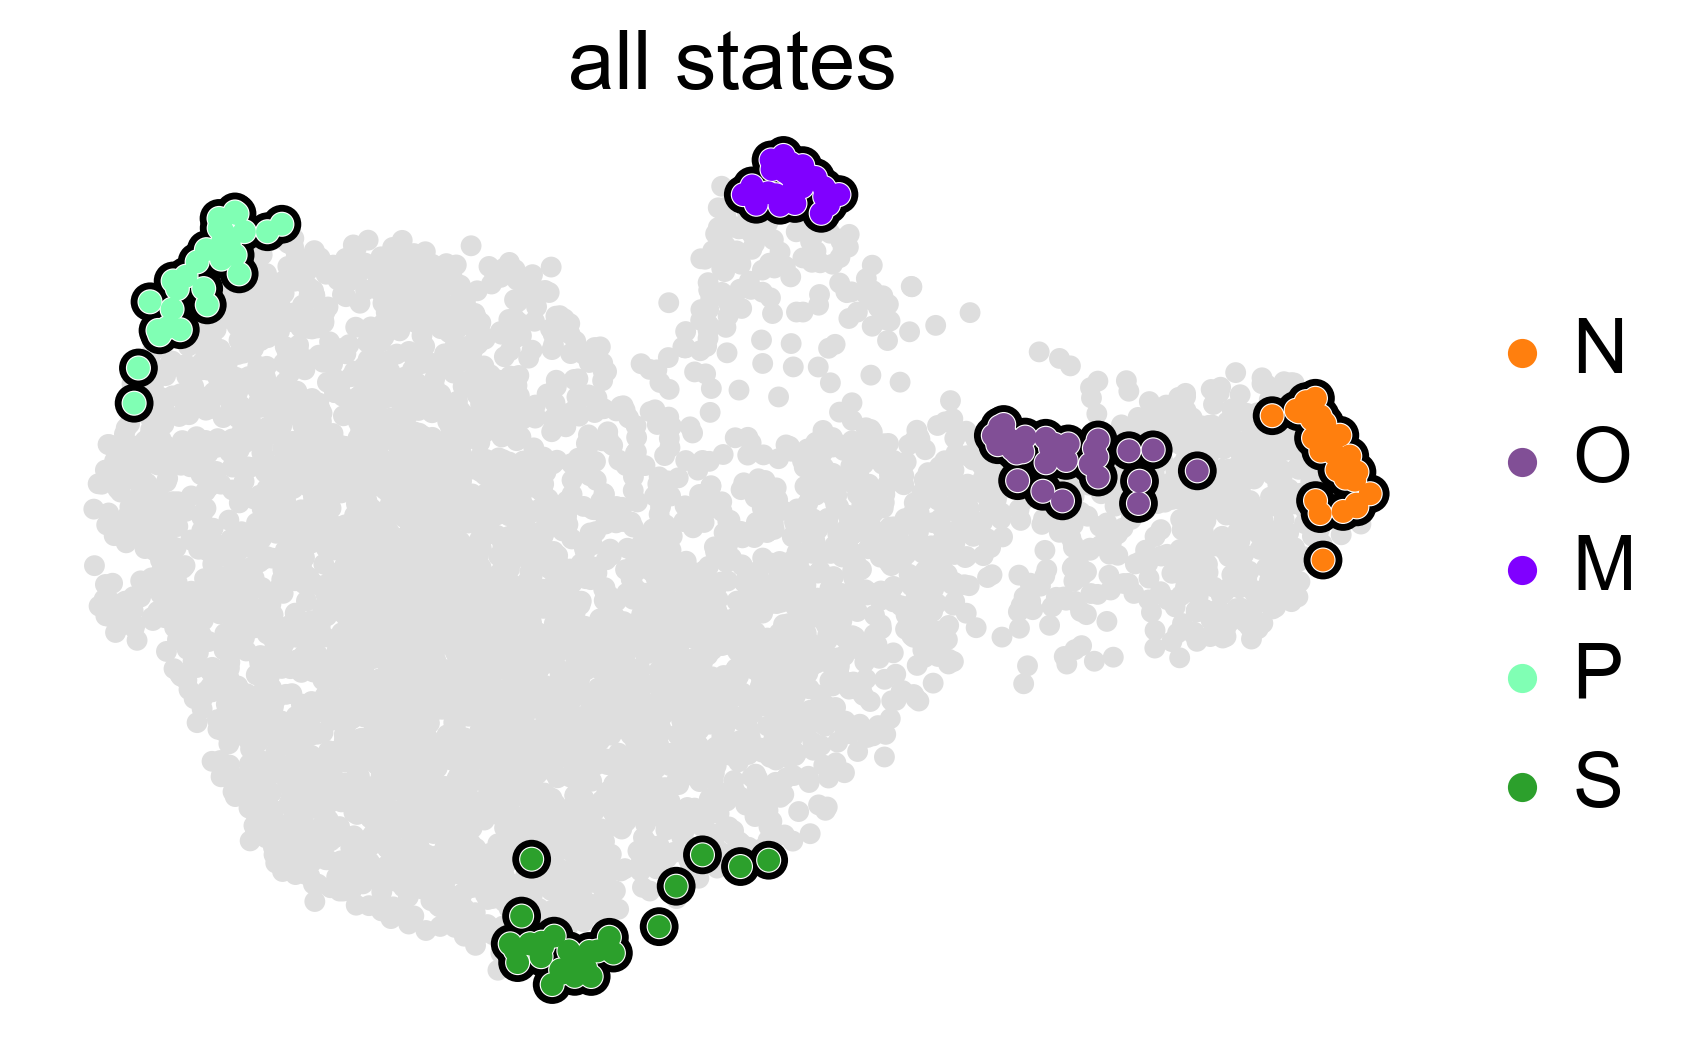

In [11]:
g_fwd.fit(cluster_key="leiden_cluster_id", n_states=[5,7])
g_fwd.plot_macrostates(which="all", discrete=True, legend_loc="right", s=100, dpi=150)

In [12]:
g_fwd.predict_terminal_states()

Adding `adata.obs['term_states_fwd']`
       `adata.obs['term_states_fwd_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`


GPCCA[kernel=(0.8 * VelocityKernel[n=5001] + 0.2 * ConnectivityKernel[n=5001]), initial_states=None, terminal_states=['M', 'P', 'S']]

/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/scatter.py:694: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/utils.py:1396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=bg_size, marker=".", c=bg_color, zorder=zord - 2, **kwargs)
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/utils.py:1397: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=gp_size, marker=".", c=gp_color, zorder=zord - 1, **kwargs)


saving figure to file /Users/yuhaochen/Documents/GitHub/graphvelo_reproducibility/figures/figures_sars_cov_2/cr_terminal.pdf


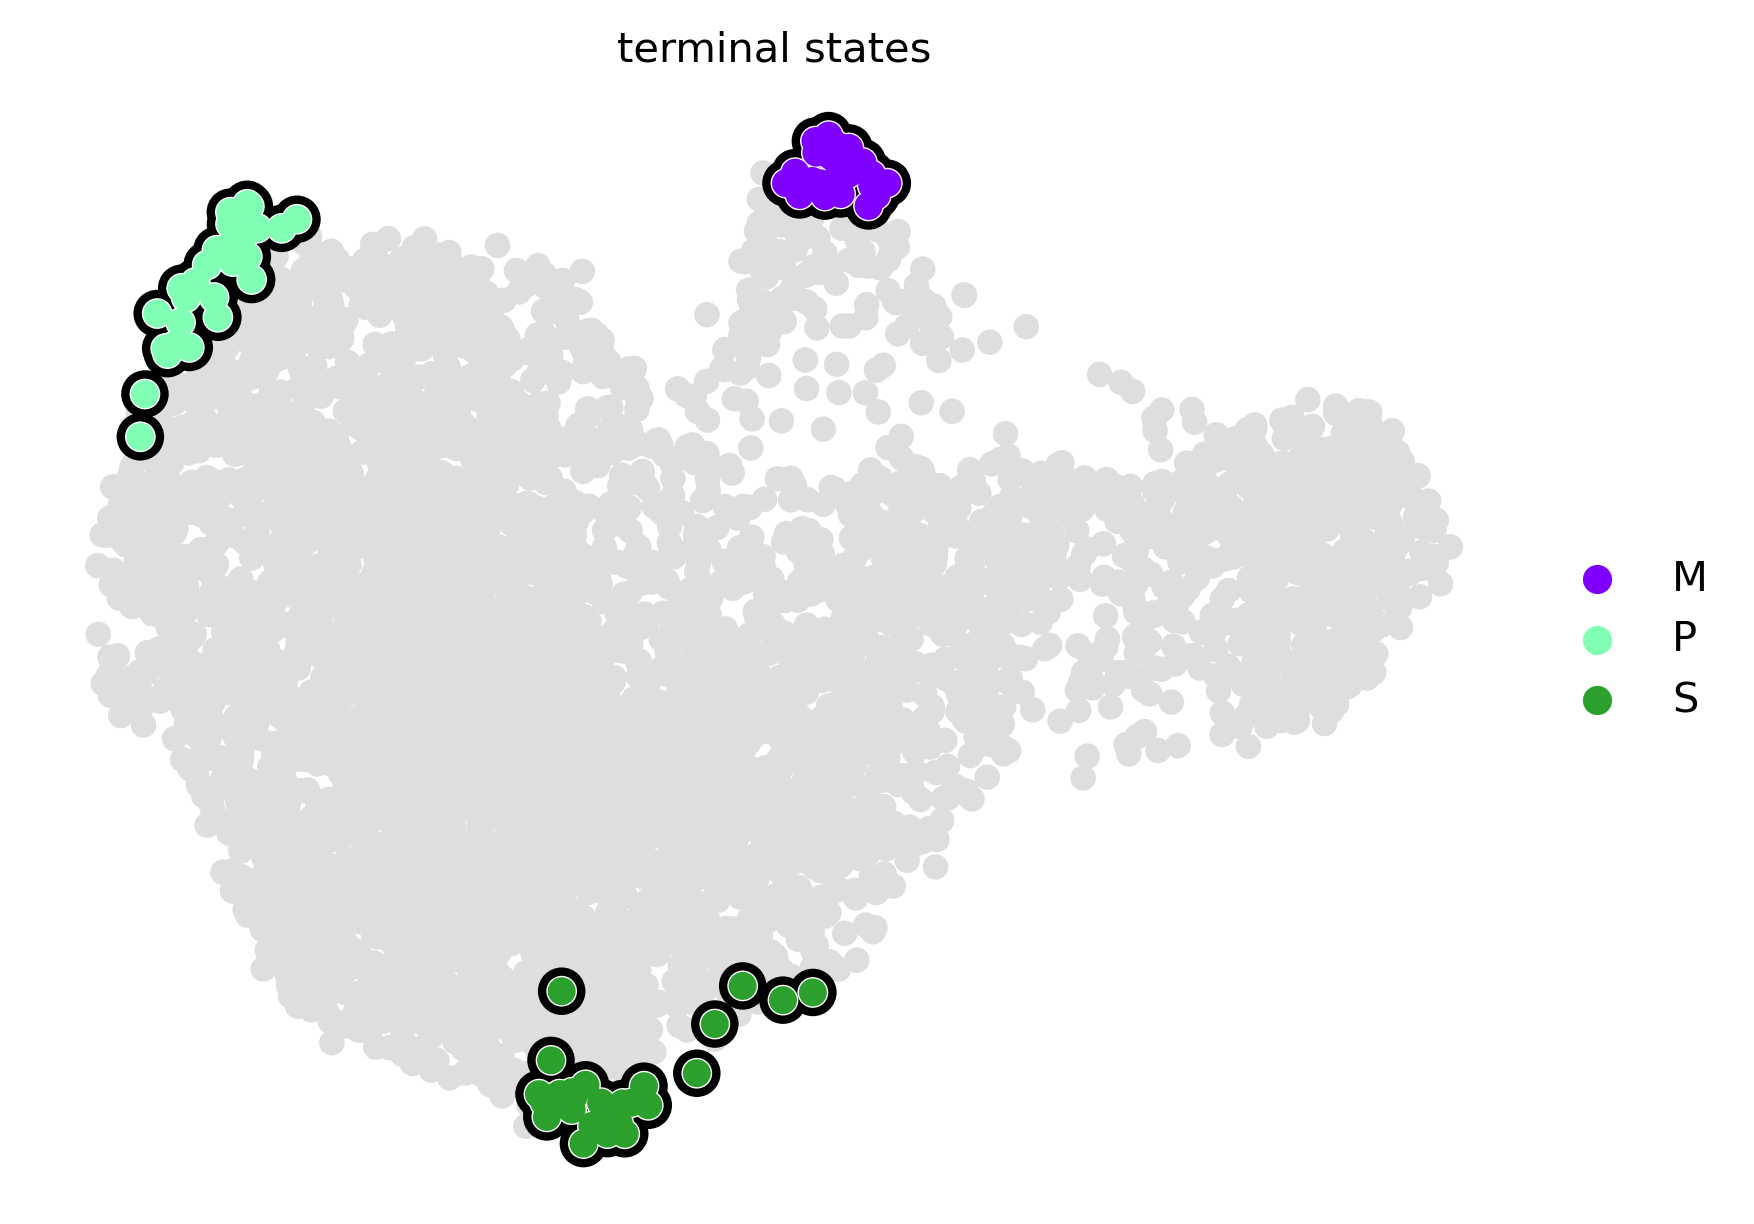

In [13]:
fig_kwargs = {'which': 'terminal', 's': 150, 'dpi': 300, 'legend_loc': 'right'}
fig_kwargs['save'] = str(FIG_DIR) + '/figures_sars_cov_2/cr_terminal.pdf' 
g_fwd.plot_macrostates(**fig_kwargs)

Adding `adata.obs['init_states_fwd']`
       `adata.obs['init_states_fwd_probs']`
       `.initial_states`
       `.initial_states_probabilities`
       `.initial_states_memberships
    Finish`


/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/scatter.py:694: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/utils.py:1396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=bg_size, marker=".", c=bg_color, zorder=zord - 2, **kwargs)
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/utils.py:1397: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=gp_size, marker=".", c=gp_color, zorder=zord - 1, **kwargs)


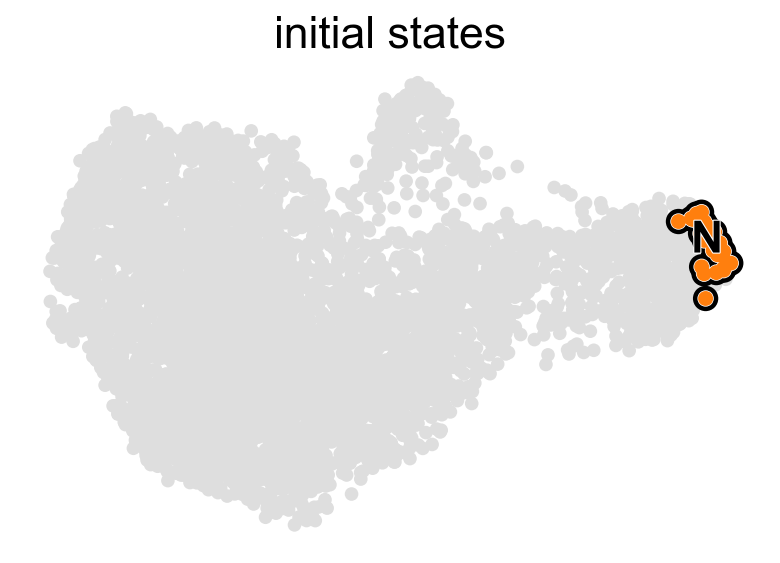

In [13]:
g_fwd.predict_initial_states()
g_fwd.plot_macrostates(which="initial", s=150)

In [14]:
g_fwd.compute_fate_probabilities()

Computing fate probabilities


  0%|          | 0/3 [00:00<?, ?/s]

Adding `adata.obsm['lineages_fwd']`
       `.fate_probabilities`
    Finish (0:00:00)


/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/opt/anaconda3/envs/scverse/lib/python3.11/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


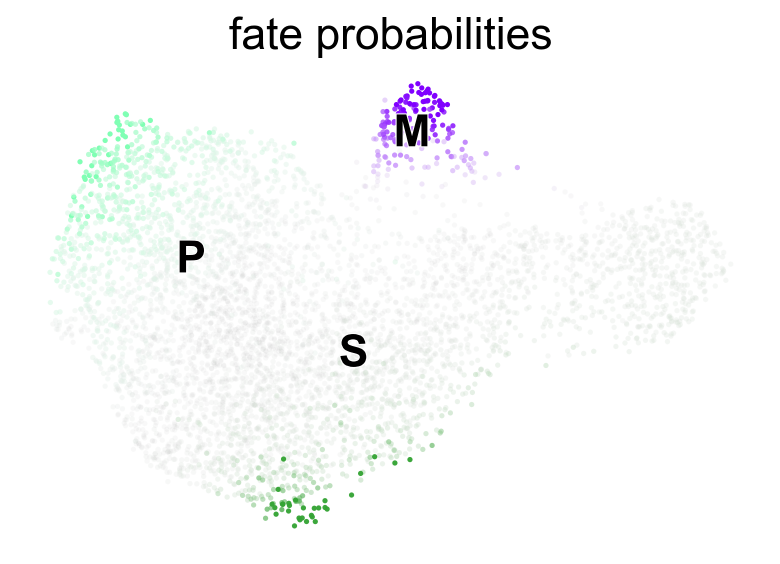

In [15]:
g_fwd.plot_fate_probabilities(same_plot=True)

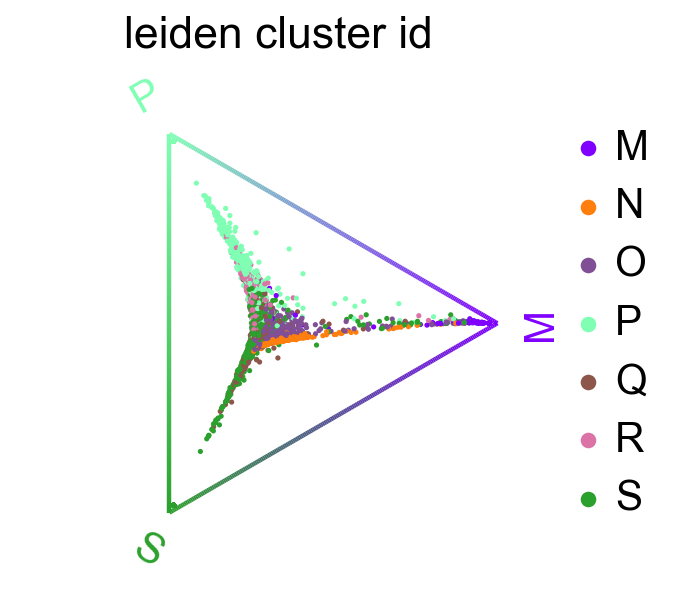

In [15]:
cr.pl.circular_projection(bdata, keys=["leiden_cluster_id"], legend_loc="right")

In [ ]:
terminals = ["M", "P"]
abortive_df = g_fwd.compute_lineage_drivers(
    lineages=["M"], cluster_key="leiden_cluster_id", clusters=terminals
)
apoptosis_df = g_fwd.compute_lineage_drivers(
    lineages=["P"], cluster_key="leiden_cluster_id", clusters=terminals
)

abortive_df.head(10), apoptosis_df.head(10)

Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)


(          M_corr         M_pval         M_qval  M_ci_low  M_ci_high
 Gene                                                               
 IFNL1   0.949003   0.000000e+00   0.000000e+00  0.941512   0.955556
 IFIT3   0.882946   0.000000e+00   0.000000e+00  0.866418   0.897542
 CCL5    0.882079   0.000000e+00   0.000000e+00  0.865437   0.896777
 IFIT2   0.879930   0.000000e+00   0.000000e+00  0.863006   0.894880
 IFNL3   0.854258  3.484832e-274  6.969663e-272  0.834036   0.872188
 HERC5   0.848971  5.165787e-266  8.609646e-264  0.828084   0.867505
 IFNL2   0.839154  8.063256e-252  1.151894e-249  0.817043   0.858801
 IFIT1   0.825180  1.570729e-233  1.963411e-231  0.801356   0.846391
 CXCL11  0.815745  2.822173e-222  3.135747e-220  0.790782   0.837999
 IFIH1   0.811881  6.806956e-218  6.806956e-216  0.786456   0.834559,
              P_corr        P_pval        P_qval  P_ci_low  P_ci_high
 Gene                                                                
 SQSTM1     0.506796  1.998019e

In [17]:
viral_genes = bdata[:, bdata.var_names.str.startswith('SCV')].var_names.values

Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)


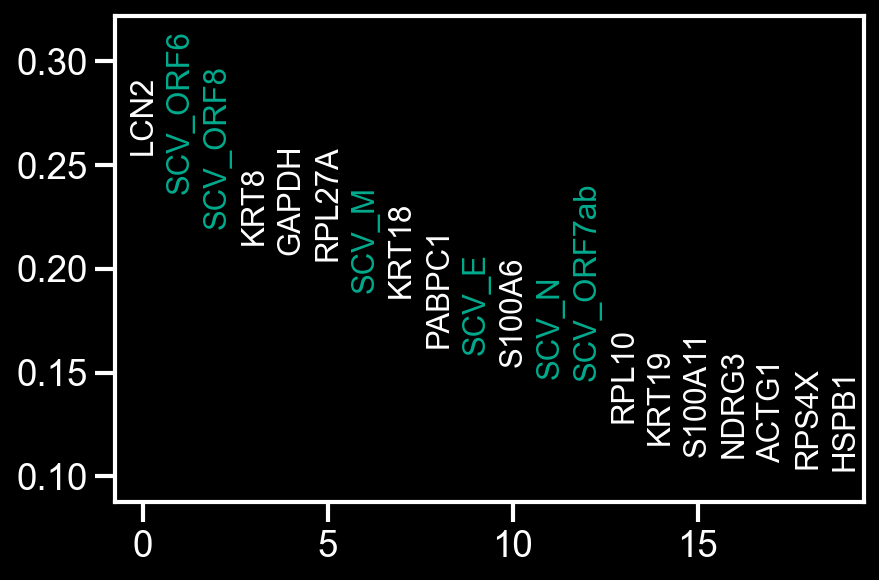

In [18]:
productive_df = g_fwd.compute_lineage_drivers(
    lineages=["S"], cluster_key="leiden_cluster_id", clusters="S"
)
gene_names = productive_df.index
cr_ranking = pd.DataFrame(
    productive_df.loc[gene_names, "S_corr"],
)
cr_ranking["ranking"] = np.arange(len(gene_names))
df = cr_ranking.iloc[:20, :]

import seaborn as sns
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(6, 4))
y_min = np.min(df["S_corr"])
y_max = np.max(df["S_corr"])

y_min -= 0.1 * (y_max - y_min)
y_max += 0.4 * (y_max - y_min)
ax.set_ylim(y_min, y_max)

ax.set_xlim(-0.75, 19.5)

for gene in df.index:
    if gene in viral_genes:
        color = "#00AB8E"
    else:
        color = "#FFFFFF"
    ax.text(
        df.loc[gene, "ranking"],
        df.loc[gene, "S_corr"],
        gene,
        rotation="vertical",
        verticalalignment="bottom",
        horizontalalignment="center",
        fontsize=14,
        color=color,
    )

fig.savefig(
    FIG_DIR / "figures_sars_cov_2" / "genes_ranked_by_correlation_pre.png",
    transparent=True,
    bbox_inches="tight",
    dpi=300
)
plt.show()

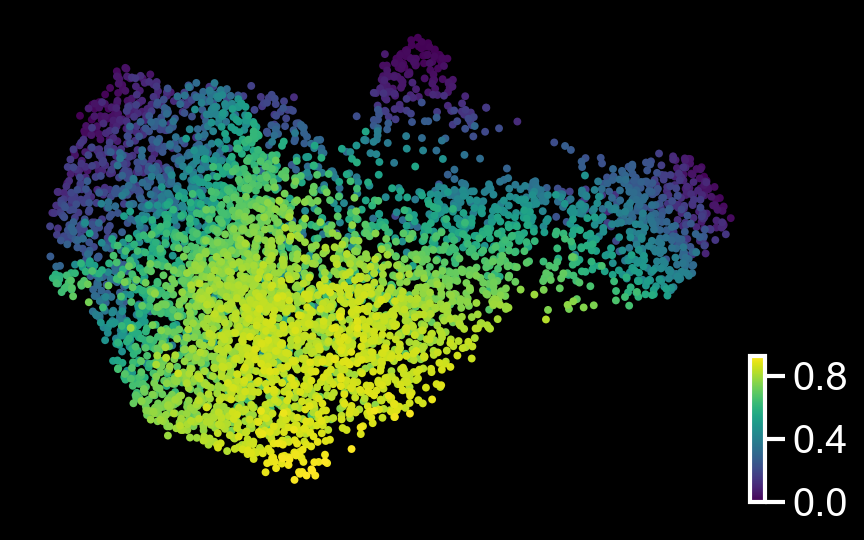

In [19]:
bdata.obs["Productive_abs_probs"] = bdata.obsm["term_states_fwd_memberships"]["S"].X.squeeze()
fig, ax = plt.subplots(figsize=(6, 4))
scv.pl.scatter(
    bdata,
    basis="umap",
    c="Productive_abs_probs",
    s=50,
    cmap="viridis",
    title="",
    ax=ax,
)
fig.savefig(
    FIG_DIR / "figures_sars_cov_2" / "productive_fate_probs_pre.png",
    transparent=True,
    bbox_inches="tight",
    dpi=300,
)
plt.show()


In [15]:
import gseapy as gp

In [34]:
abortive_driver = [i for i in abortive_df[:20].index.tolist() if not i.startswith('SCV')]
apoptosis_driver = [i for i in apoptosis_df[:20].index.tolist() if not i.startswith('SCV')]
len(abortive_driver), len(apoptosis_driver)

(20, 20)

In [35]:
enr_abortive = gp.enrichr(abortive_driver, gene_sets='GO_Biological_Process_2021', outdir=None)
enr_apoptosis = gp.enrichr(apoptosis_driver, gene_sets='GO_Biological_Process_2021', outdir=None)

In [36]:
enr_abortive.res2d.Term = enr_abortive.res2d.Term.str.split(" \(GO").str[0]
enr_apoptosis.res2d.Term = enr_apoptosis.res2d.Term.str.split(" \(GO").str[0]
enr_abortive.res2d['Lineage'] = 'Abortive'
enr_apoptosis.res2d['Lineage'] = 'Apoptosis'
enr_res = pd.concat([enr_abortive.res2d.head(), enr_apoptosis.res2d.head()])

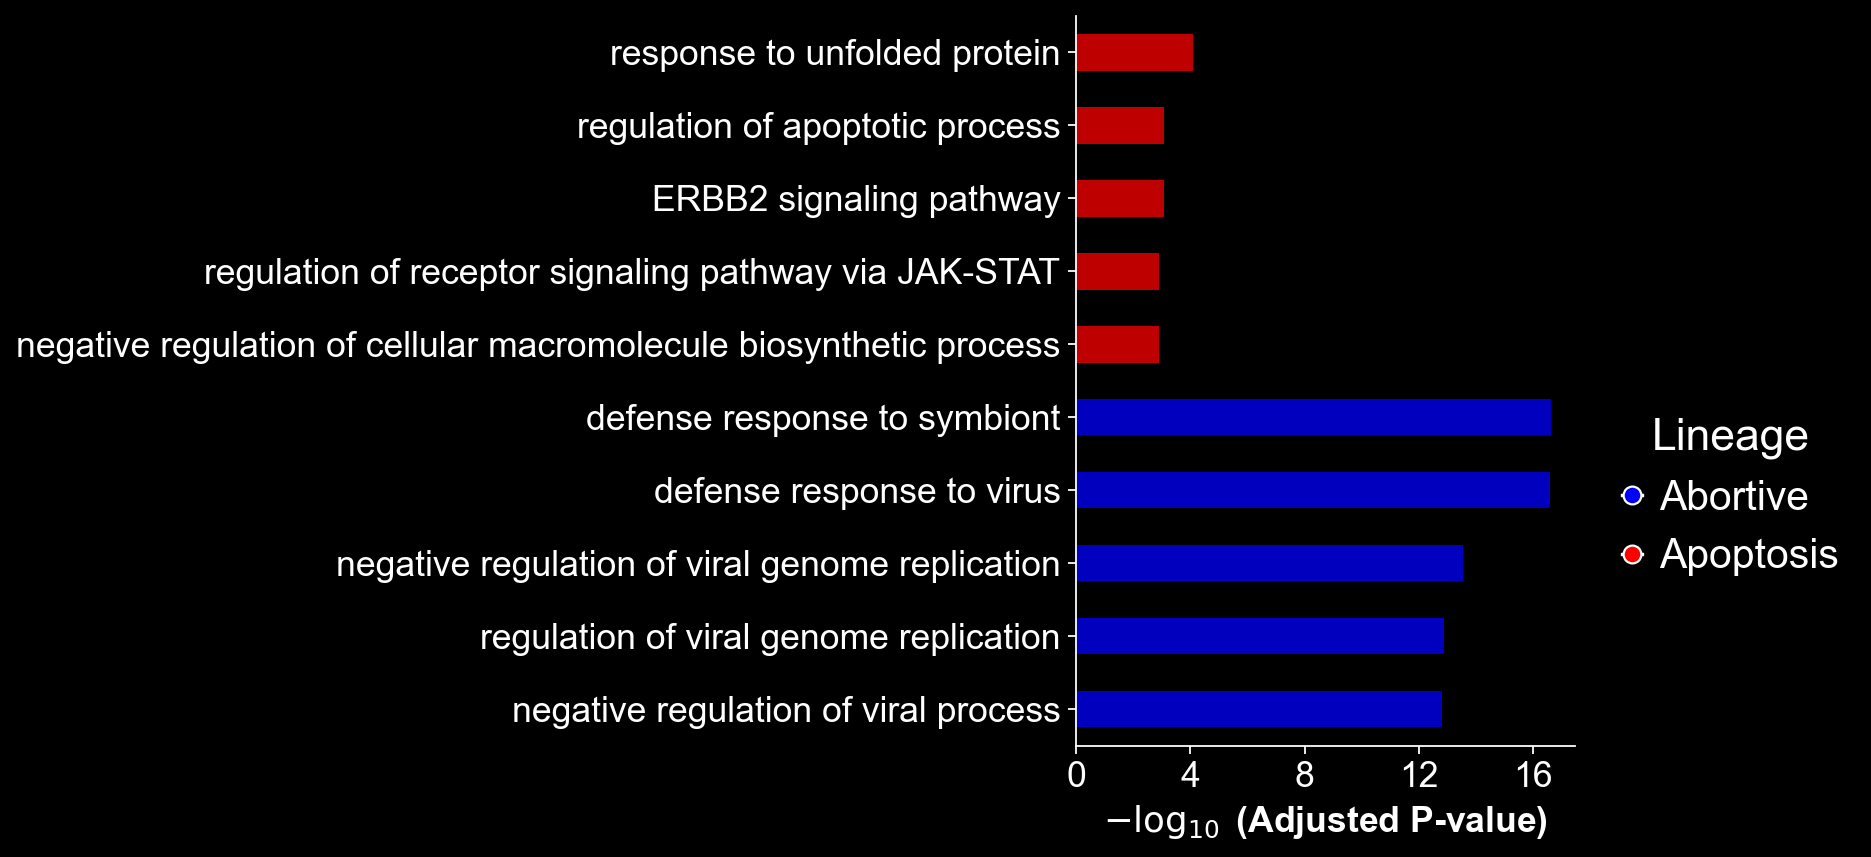

In [ ]:
save_kwargs = {'dpi': 300, 'fname': str(FIG_DIR)+'/figures_sars_cov_2/lineage_drivers_gsea_pre.png', 'transparent': True, 'bbox_inches' : "tight"}
ax = gp.barplot(enr_res,
                group ='Lineage',
                title ="",
                color = ['b', 'r'])
plt.savefig(**save_kwargs)
plt.show()